# Falling Coffee Filter

The discussion on this notebook follows the text closely. Refer to pages 59 (bottom) through 63.

The following data track a coffee filter that was released to fall under the influence of gravity. The large surface area of the coffee filter makes air resistance an important consideration. You will soon learn there are complexities in real data acquired with experimental and measurement errors. To begin, note the time value does not start at zero. Also note that you can assume the $\Delta t$ is about 0.0247 and not variable (even though it does vary).

`
//Falling coffee filter
//Time ( s )	Position ( m )
0.2055	0.4188
0.2302	0.4164
0.255	0.4128
0.2797	0.4082
0.3045	0.4026
0.3292	0.3958
0.3539	0.3878
0.3786	0.3802
0.4033	0.3708
0.428	0.3609
0.4526	0.3505
0.4773	0.34
0.502	0.3297
0.5266	0.3181
0.5513	0.3051
0.5759	0.2913
0.6005	0.2788
0.6252	0.2667
0.6498	0.2497
0.6744	0.2337
0.699	0.2175
0.7236	0.2008
0.7482	0.1846
0.7728	0.1696
0.7974	0.1566
0.822	0.1393
0.8466	0.1263
`

### Problem 1

Cut and paste the data into a file. Read the file and plot the positions as a function of time.

In [31]:
# I've tried to save this notebook in such a way that an image of the output appears below, so you can check your result against it.
# Please let me know if you don't see the graph below that plots position vs. time.

In [32]:
# Read input from falling.txt
import pandas as pd

df = pd.read_csv('falling.txt', delimiter='\t', skiprows=1)
df


,Time (s),Position (m)
0,0.2055,0.4188
1,0.2302,0.4164
2,0.2550,0.4128
3,0.2797,0.4082
4,0.3045,0.4026
5,0.3292,0.3958
6,0.3539,0.3878
7,0.3786,0.3802
8,0.4033,0.3708
9,0.4280,0.3609


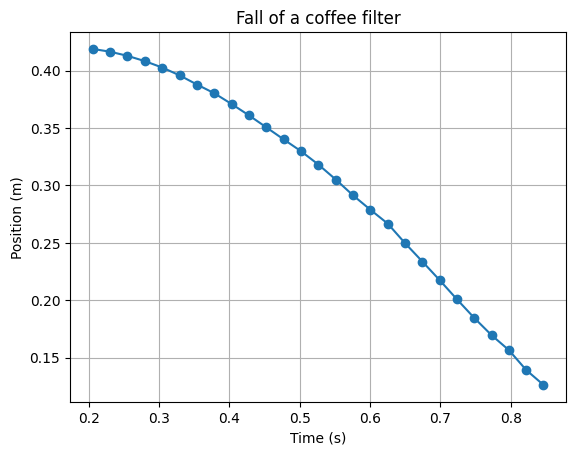

In [33]:
# Plot observed position vs. time
import matplotlib.pyplot as plt
plt.plot(df.iloc[:, 0], df.iloc[:, 1], marker='o')

plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.title('Fall of a coffee filter')
plt.grid(True)

## Computing derivatives

As you are seeing in class, derivatives of quantities are critical to our understanding of the world. With position data, we can find velocity and acceleration from derivatives. A good balance between accuracy and simplicity is achieved with central finite differencing schemes. The formulas are as follows

$$v(t) = \frac{y(t + \Delta t) - y(t - \Delta t)}{2\Delta t}$$

and for acceleration

$$a(t) = \frac{y(t + \Delta t) - 2y(t) + y(t - \Delta t)}{\Delta t^2}.$$

### Problem 2
Determine the first and second derivatives of position: velocity, and acceleration respectively. Plot them. Give careful thought to what the values on the time axis should be. Make clear distinctions between the points the derivatives are computed at and the lines connecting them. Label axes. Estimate, by inspection, the terminal velocity of the coffee filter. Comment on any unusual features you see in the data. Finally, plot $a$ vs $v$ and see if that provides addition insight into the terminal velocity.


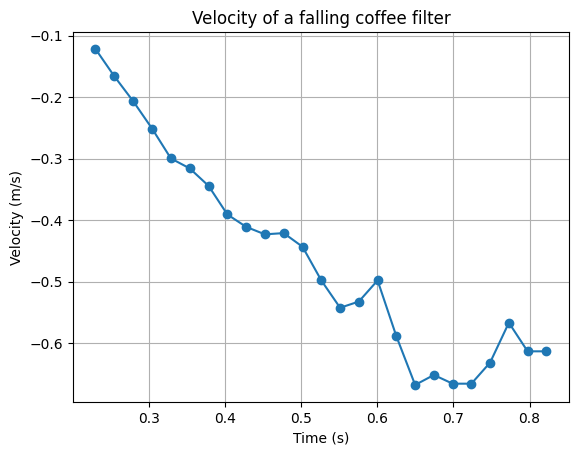

In [34]:
# Plot the first derivative of position vs. time (velocity)
delta_t = 0.0247

# Calculate the first derivative (velocity) using central finite difference
velocity = ( df['Position (m)'].shift(-1) - df['Position (m)'].shift(1) ) / (2 * delta_t)
# print(velocity)

# Plot the first derivative of position vs. time
plt.plot(df['Time (s)'], velocity, marker='o')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Velocity of a falling coffee filter')
plt.grid(True)
plt.show()

(27, 2)


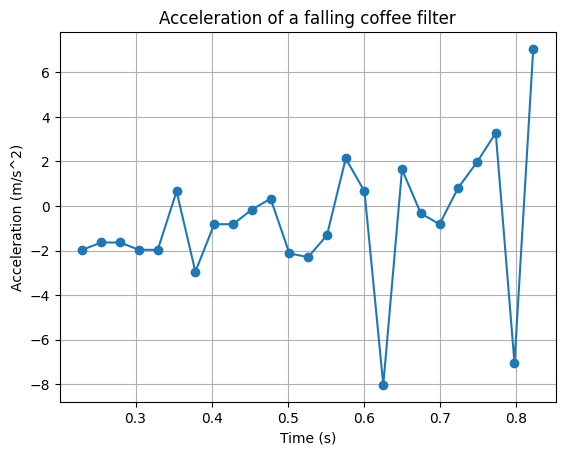

In [78]:
# Plot the second derivative of position vs. time (acceleration)
delta_t = 0.0247

# Calculate the second derivative (acceleration) using central finite difference
acceleration = ( df['Position (m)'].shift(-1) - (2 * df['Position (m)']) + df['Position (m)'].shift(1) ) / (delta_t ** 2)
# print(acceleration)

print(df.shape)

# Plot the first derivative of position vs. time
plt.plot(df['Time (s)'], acceleration, marker='o')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.title('Acceleration of a falling coffee filter')
plt.grid(True)
plt.show()

_Notes: I'm thinking that it reaches its terminal velocity at the inflection point of the 2nd derivative a(t) at approximately between t=0.5 and t=0.6 the coffee filter accelerates up until t=0.55 then decelerates some, presumably when it encounters a stronger point of air resistance. An unusal feature is that it then starts to accelerate again._

_Looking back at the first derivative graph of v(t) the velocity seems to stabilize between t=0.65 and t=0.725 before decelerating to t=0.775_

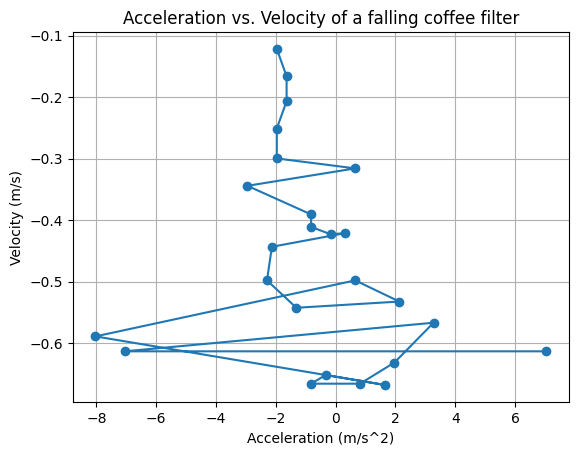

In [79]:
# print(acceleration.shape)
# print(velocity.shape)

# Plot acceleration vs. velocity
plt.plot(acceleration, velocity, marker='o')
plt.xlabel('Acceleration (m/s^2)')
plt.ylabel('Velocity (m/s)')
plt.title('Acceleration vs. Velocity of a falling coffee filter')
plt.grid(True)
plt.show()

_Notes: I don't really understand what this graph is showing us about the terminal velocity._

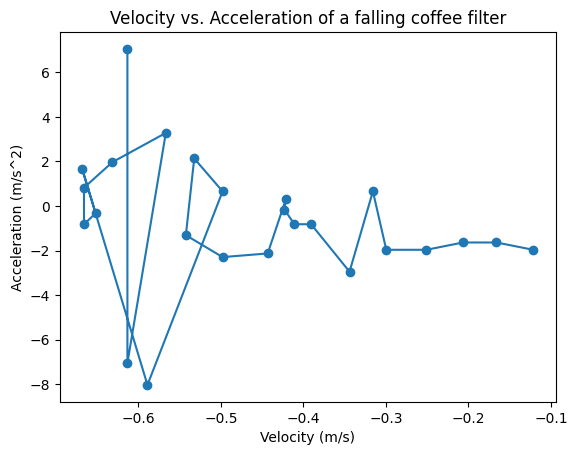

In [ ]:
# Plot velocity vs. acceleration
plt.plot(velocity, acceleration, marker='o')
plt.xlabel('Velocity (m/s)')
plt.ylabel('Acceleration (m/s^2)')
plt.title('Velocity vs. Acceleration of a falling coffee filter')
plt.show()

### Friction on a falling body

The role of friction on a falling body can generally be modeled with the simple modification of Newton's Second Law. Assume there is another force, friction, that opposes motion. Now there are two forces, gravity pulling the object down, and friction, pushing the object back up. We call the frictional forces *drag*. It can be modeled as

$$F_d = C_1v$$

or 

$$F_d = C_2v^2$$ 

depending on the speed and diameter of the objects. 

These are *phenomenological laws* - they have been found to work through experimentation, but their range of validity is small.

Eventually, terminal velocity is reached. This is the point where the drag resistance is equal to gravity and the object's speed no longer changes.

$$ mg = C_1 v_t \rightarrow C_1 = \frac{mg}{v_t}$$

and for quadratic drag

$$ mg = C_2 v_t^2 \rightarrow C_2= \frac{mg}{v_t^2}$$

While just minor algebra, these expression relate the constants in terms of things you can measure - the terminal velocity

$$F_d = \frac{mg}{v_t}v$$

and

$$F_d = mg \left(\frac{v}{v_t}\right)^2.$$ 

We're close to completion. Finally, write the complete balance of forces for a falling body with friction

$$F = -mg\left(1 - \frac{v}{v_t}\right)$$

and

$$F = -mg\left(1 - \left(\frac{v}{v_t}\right)^2\right)$$ 

#### Problem 3
Chose the appropriate numerical algorithm from last week to integrate the system of ODEs resulting from both linear and quadratic drag forces. Experiment with the values of $v_t$ to try and get the best possible fit to the data. Comment on which of the two drag relations appears to work better.

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# draw plots inline in the notebook without explcitly calling plt.show()
%matplotlib inline


def Euler(dt, f, t, y, args):
    return y + f(t,y,*args) * dt

def EulerCromer(dt, f, t, y, args):
    # First calculate the next value
    y_next = y + f(t, y, *args) * dt
    # Then use this updated value to calculate the final result
    return y + f(t + dt, y_next, *args) * dt
    # The key difference between this and regular Euler is:
    # Regular Euler just uses f(t, y)
    # Euler-Cromer uses f(t + dt, y_next) where y_next is found using a regular Euler step
    # The term f(y(t+Δt), t+Δt) is calculated by first doing an Euler step to get y(t+Δt), then using that to evaluate f.

def EulerRichardson(dt, f, t, y, args):
    # Step 1: Calculate k1 = f(t, y)
    k1 = f(t, y, *args)

    # Step 2: Calculate the midpoint value
    y_mid = y + (k1 * dt/2)

    # Step 3: Calculate k2 = f(t + dt/2, y + k1*dt/2)
    k2 = f(t + dt/2, y_mid, *args)

    # Step 4: Use k2 for the full step
    return y + k2 * dt


def solve_ode(f, tspan, y0, *args, method=Euler, **options):
    """
    Given a function f that returns derivatives,
    dy / dt = f(t, y)
    and an inital state:
    y(tspan[0]) = y0

    This function will return the set of intermediate states of y
    from t0 (tspan[0]) to tf (tspan[1])



    The function is called as follows:

    INPUTS

    f - the function handle to the function that returns derivatives of the
        vector y at time t. The function can also accept parameters that are
        passed via *args, eg f(t,y,g) could accept the acceleration due to gravity.

    tspan - a indexed data type that has [t0 tf] as its two members.
            t0 is the initial time
            tf is the final time

    y0 - The initial state of the system, must be passed as a numpy array.

    method - The method of integrating the ODEs. This week will be one of Euler,
             Euler-Cromer, or Euler-Richardson

    *args - a tuple containing as many additional parameters as you would like for
            the function handle f.

    **options - a dictionary containing all the keywords that might be used to control
                function behavior. For now, there is only one:

                first_step - the initial time step for the simulation.


    OUTPUTS

    t,y

    The returned states will be in the form of a numpy array
    t containing the times the ODEs were solved at and an array
    y with shape tsteps,N_y where tsteps is the number of steps
    and N_y is the number of equations. Observe this makes plotting simple:

    plt.plot(t,y[:,0])

    would plot positions.

    """

    dt = options.get('first_step', 0.01) # get the first_step option, or use 0.01 as default

    t0 = tspan[0]
    tf = tspan[1]
    t = [t0]
    y = [y0]

    # while t[-1]<tf:
    #     y.append(method(dt,f,t,y,args))
    #     t.append(t[-1]+dt)

    while t[-1] < tf: # Expanded for readability
        # Get the current time and state
        current_t = t[-1]
        current_y = y[-1]

        # Compute the next state using the chosen method
        next_y = method(dt, f, current_t, current_y, args)

        # Append results
        y.append(next_y)
        t.append(current_t + dt)

    return np.array(t), np.array(y)

#### Linear Drag

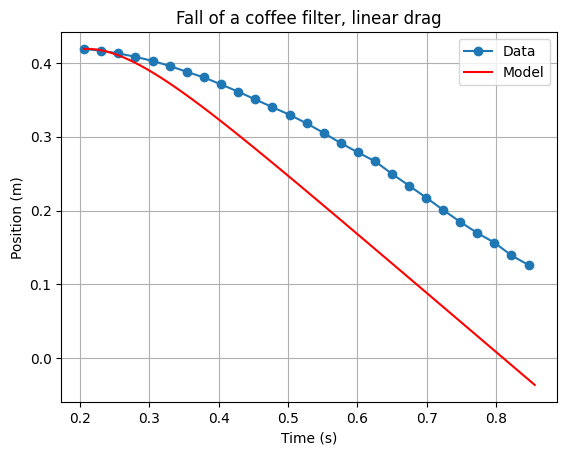

In [83]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
g = 9.81  # m/s^2

# Differential equations for linear drag
def linear_drag(t, state, g, vt):
    v, y = state
    dvdt = -g * (1 - v / vt)
    dydt = v
    return np.array([dvdt, dydt])

# Initial conditions
v0 = 0.0  # Initial velocity
y0 = df['Position (m)'].iloc[0]  # Initial position (start at the highest point of the data)
initial_state = np.array([v0, y0])
# print(initial_state)

t_span = (df['Time (s)'].iloc[0], df['Time (s)'].iloc[-1])
# print(t_span)

# Terminal velocity to test
vt = -0.8  # terminal velocity (m/s)

t, y = solve_ode(linear_drag, t_span, initial_state, g, vt, method=Euler, first_step=0.01)
# print(y)

# Plot the results
plt.plot(df['Time (s)'], df['Position (m)'], marker='o', label='Data')
plt.plot(t, y[:, 1], 'r-', label='Model')

plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Fall of a coffee filter, linear drag')
plt.grid(True)
plt.legend()
plt.show()

#### Quadratic Drag

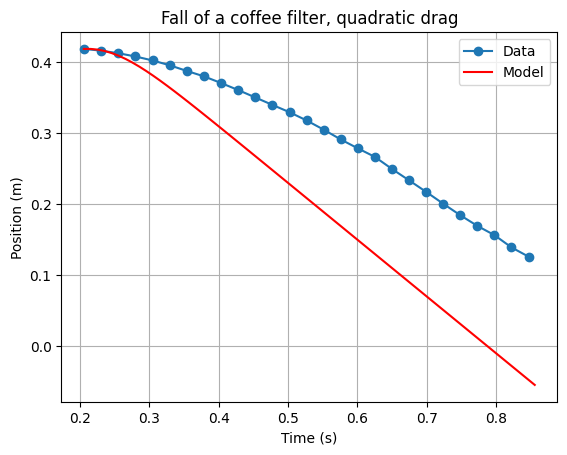

In [84]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
g = 9.81  # m/s^2

# Differential equations for quadratic drag
def quadratic_drag(t, state, g, vt):
    v, y = state
    dvdt = -g * (1 - (v / vt)**2)
    dydt = v
    return np.array([dvdt, dydt])

# Initial conditions
v0 = 0.0  # Initial velocity
y0 = df['Position (m)'].iloc[0]  # Initial position (start at the highest point of the data)
initial_state = np.array([v0, y0])
# print(initial_state)

t_span = (df['Time (s)'].iloc[0], df['Time (s)'].iloc[-1])
# print(t_span)

# Terminal velocity to test
vt = -0.8  # terminal velocity (m/s)

t, y = solve_ode(quadratic_drag, t_span, initial_state, g, vt, method=Euler, first_step=0.01)
# print(y)

# Plot the results
plt.plot(df['Time (s)'], df['Position (m)'], marker='o', label='Data')
plt.plot(t, y[:, 1], 'r-', label='Model')

plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Fall of a coffee filter, quadratic drag')
plt.grid(True)
plt.legend()
plt.show()

In [12]:
# Try and match my graphs below.

### Generalization of drag force

While 'low' and 'high' speeds are not well characterized, and it's not easy to decide which applies to the coffee filter, it is possible to generalize what we don't know and systematically explore it. 

Let us suppose the coffee filter is in the process of transitioning from a linear to a quadratic drag force. Write the balance of forces on the falling body as:

$$F = -mg\left( 1 - \left( \frac{v}{v_t}\right)^{\alpha} \right)$$

#### Problem 4
Code up this generalized drag force and plot the results of the ODE solver on the same axes as the position data. Through visual inspection, come up with the best fit you can.
